In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [40]:
df = pd.read_csv("data/spatial-rain-hii.csv")
print(df.head())

   YEAR  MONTH  PROV_ID           PROV_T    MinRain     MaxRain     AvgRain
0  2018      1       10    กรุงเทพมหานคร  54.299999  257.230011  142.119137
1  2018      1       11      สมุทรปราการ  76.250000  256.100006  137.302046
2  2018      1       12          นนทบุรี  38.360001  161.470001  113.433771
3  2018      1       13         ปทุมธานี  51.439999  116.500000   82.901688
4  2018      1       14  พระนครศรีอยุธยา   8.850000   88.589996   39.960089


In [41]:
df.describe(include='all')

,YEAR,MONTH,PROV_ID,PROV_T,MinRain,MaxRain,AvgRain
count,7084.000000,7084.000000,7084.000000,7084,7084.000000,7084.000000,7084.000000
unique,NaN,NaN,NaN,77,NaN,NaN,NaN
top,NaN,NaN,NaN,กรุงเทพมหานคร,NaN,NaN,NaN
freq,NaN,NaN,NaN,92,NaN,NaN,NaN
mean,2021.347826,6.326087,51.129870,NaN,85.751294,190.774180,130.285111
std,2.218826,3.414115,24.943954,NaN,99.093571,189.948223,132.369089
min,2018.000000,1.000000,10.000000,NaN,0.000000,0.000000,0.000000
25%,2019.000000,3.000000,31.000000,NaN,4.765000,37.292500,18.271285
50%,2021.000000,6.000000,50.000000,NaN,56.670000,152.930000,102.885111
75%,2023.000000,9.000000,72.000000,NaN,135.262496,278.827507,198.167024


In [42]:
# Filter data for January 2018
filtered_data = df[(df['YEAR'] == 2025) & (df['MONTH'] == 2)]

# Count unique provinces
unique_provinces = filtered_data['PROV_T'].nunique()
print(f"Number of unique provinces in January 2018: {unique_provinces}")

Number of unique provinces in January 2018: 77


In [43]:
# Loop through years and months to count unique provinces for each combination
for year in df['YEAR'].unique():
    for month in df['MONTH'].unique():
        filtered_data = df[(df['YEAR'] == year) & (df['MONTH'] == month)]
        unique_provinces = filtered_data['PROV_T'].nunique()
        print(f"Year: {year}, Month: {month}, Unique Provinces: {unique_provinces}")

Year: 2018, Month: 1, Unique Provinces: 77
Year: 2018, Month: 2, Unique Provinces: 77
Year: 2018, Month: 3, Unique Provinces: 77
Year: 2018, Month: 4, Unique Provinces: 77
Year: 2018, Month: 5, Unique Provinces: 77
Year: 2018, Month: 6, Unique Provinces: 77
Year: 2018, Month: 7, Unique Provinces: 77
Year: 2018, Month: 8, Unique Provinces: 77
Year: 2018, Month: 9, Unique Provinces: 77
Year: 2018, Month: 10, Unique Provinces: 77
Year: 2018, Month: 11, Unique Provinces: 77
Year: 2018, Month: 12, Unique Provinces: 77
Year: 2019, Month: 1, Unique Provinces: 77
Year: 2019, Month: 2, Unique Provinces: 77
Year: 2019, Month: 3, Unique Provinces: 77
Year: 2019, Month: 4, Unique Provinces: 77
Year: 2019, Month: 5, Unique Provinces: 77
Year: 2019, Month: 6, Unique Provinces: 77
Year: 2019, Month: 7, Unique Provinces: 77
Year: 2019, Month: 8, Unique Provinces: 77
Year: 2019, Month: 9, Unique Provinces: 77
Year: 2019, Month: 10, Unique Provinces: 77
Year: 2019, Month: 11, Unique Provinces: 77
Year: 

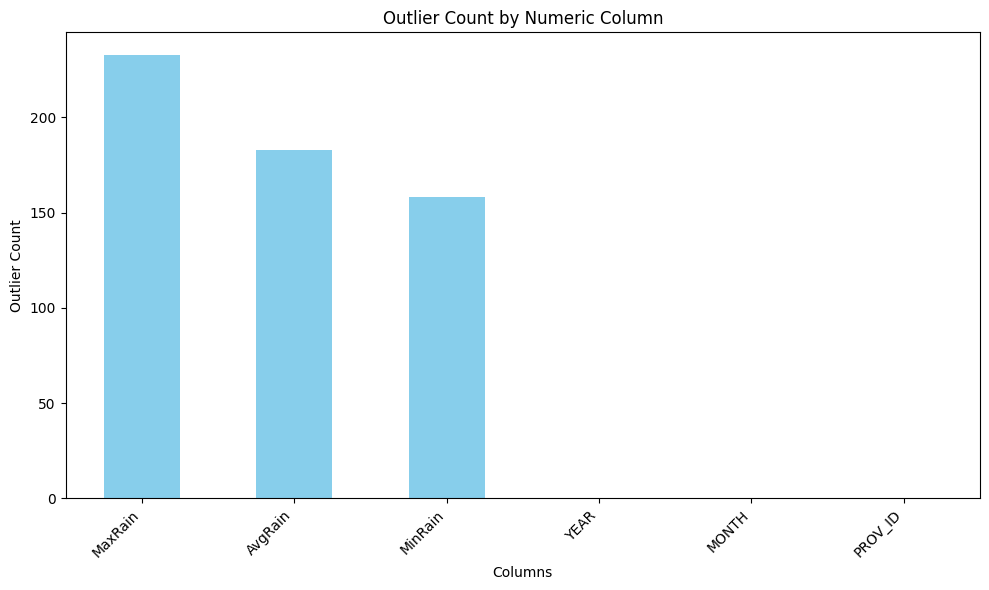

In [44]:
# We'll use the IQR method to detect outliers for numeric columns



numeric_cols = df.select_dtypes(include=["number"]).columns



outlier_report = {}



for col in numeric_cols:

    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    outlier_report[col] = {

        "Lower Bound": lower_bound,

        "Upper Bound": upper_bound,

        "Outlier Count": len(outliers),

        "Outlier Percentage": (len(outliers) / len(df)) * 100

    }



outlier_df = pd.DataFrame(outlier_report).T


# Plot the outlier report
outlier_df_sorted = outlier_df.sort_values(by="Outlier Count", ascending=False)

plt.figure(figsize=(10, 6))
outlier_df_sorted["Outlier Count"].plot(kind="bar", color="skyblue")
plt.title("Outlier Count by Numeric Column")
plt.xlabel("Columns")
plt.ylabel("Outlier Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

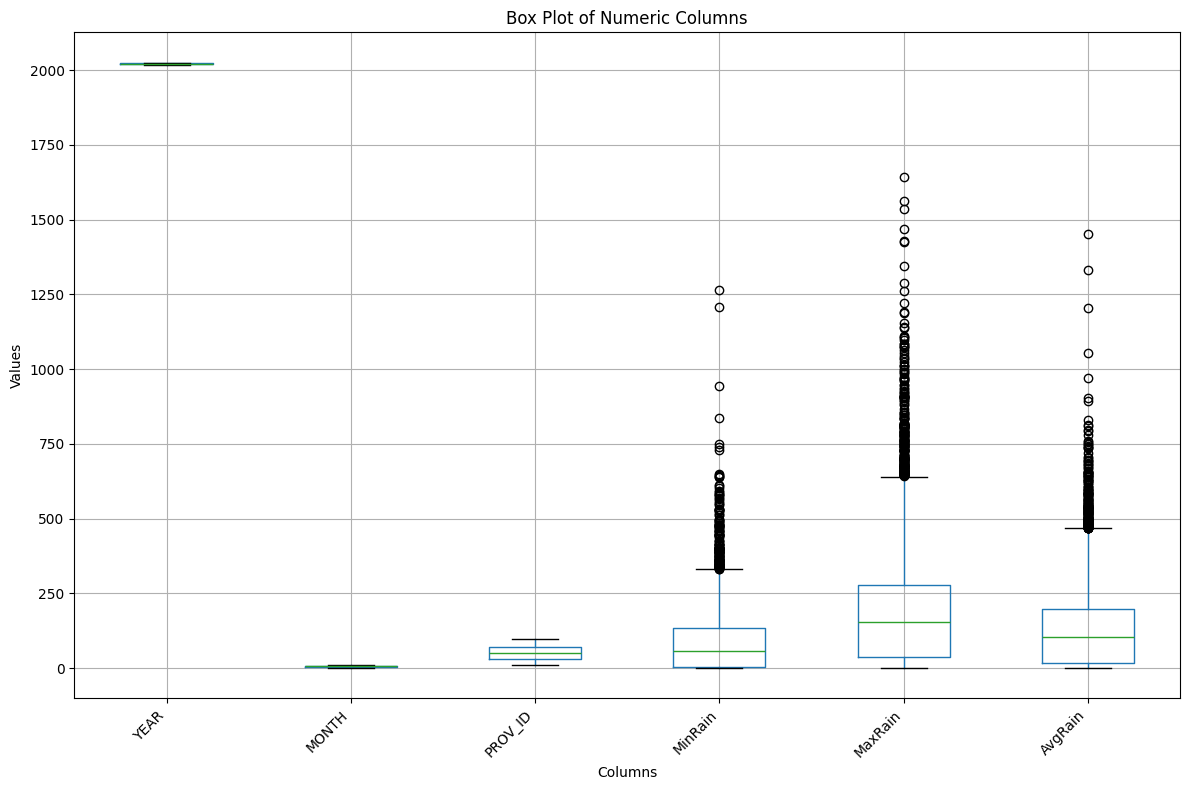

In [45]:
# Create a box plot for numeric columns
plt.figure(figsize=(12, 8))
df[numeric_cols].boxplot()
plt.title("Box Plot of Numeric Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [46]:
# Drop columns with all NaN values
df = df.dropna(axis=1, how='all')
print("Columns with all NaN values have been dropped.")

Columns with all NaN values have been dropped.


In [47]:
# Feature scaling for MinRain, MaxRain, and AvgRain columns

scaler = MinMaxScaler()
scaled_columns = ['MinRain', 'MaxRain', 'AvgRain']

df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
print("Feature scaling applied to MinRain, MaxRain, and AvgRain columns.")

Feature scaling applied to MinRain, MaxRain, and AvgRain columns.


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084 entries, 0 to 7083
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     7084 non-null   int64  
 1   MONTH    7084 non-null   int64  
 2   PROV_ID  7084 non-null   int64  
 3   PROV_T   7084 non-null   object 
 4   MinRain  7084 non-null   float64
 5   MaxRain  7084 non-null   float64
 6   AvgRain  7084 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 387.5+ KB


In [49]:
df.describe(include='all')

,YEAR,MONTH,PROV_ID,PROV_T,MinRain,MaxRain,AvgRain
count,7084.000000,7084.000000,7084.000000,7084,7084.000000,7084.000000,7084.000000
unique,NaN,NaN,NaN,77,NaN,NaN,NaN
top,NaN,NaN,NaN,กรุงเทพมหานคร,NaN,NaN,NaN
freq,NaN,NaN,NaN,92,NaN,NaN,NaN
mean,2021.347826,6.326087,51.129870,NaN,0.067834,0.116159,0.089689
std,2.218826,3.414115,24.943954,NaN,0.078388,0.115656,0.091124
min,2018.000000,1.000000,10.000000,NaN,0.000000,0.000000,0.000000
25%,2019.000000,3.000000,31.000000,NaN,0.003769,0.022707,0.012578
50%,2021.000000,6.000000,50.000000,NaN,0.044829,0.093117,0.070827
75%,2023.000000,9.000000,72.000000,NaN,0.107000,0.169773,0.136420
